In [64]:
#import the libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
data = pd.read_csv("dataset.csv")
print("Dataset Shape:", data.shape)


Dataset Shape: (250, 8)


In [66]:
print(data.columns)

Index(['Age', 'Annual Income', 'Spending Score', 'Gender', 'Location',
       'Family Size', 'Occupation', 'Education'],
      dtype='object')


In [67]:
print(data.size)

2000


In [68]:
#data preprocessing using label encoding
from sklearn.preprocessing import LabelEncoder,StandardScaler

obj=LabelEncoder()
data['Gender']=obj.fit_transform(data['Gender'])
data['Location']=obj.fit_transform(data['Location'])
data['Occupation']=obj.fit_transform(data['Occupation'])
data['Education']=obj.fit_transform(data['Education'])

# Data preprocessing using label encoding
# le = LabelEncoder()
# categorical_columns = ['Gender', 'Location', 'Occupation', 'Education']
# for col in categorical_columns:
#     data[col] = le.fit_transform(data[col])


In [69]:
# Feature scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(data)
features_df = pd.DataFrame(features_scaled, columns=data.columns)

In [70]:
features_df

,Age,Annual Income,Spending Score,Gender,Location,Family Size,Occupation,Education
0,1.368290,0.359492,-1.239574,-1.0,-1.074789,-0.254442,-0.090085,-0.686878
1,0.577005,-0.960610,1.496569,1.0,-1.074789,-0.254442,-1.113772,1.415811
2,-0.530794,0.780383,-1.543590,-1.0,-1.074789,1.480387,0.933603,0.714914
3,-1.084694,1.514264,-0.530204,1.0,0.930415,-1.410994,0.933603,0.714914
4,-0.056023,-1.472113,1.226333,-1.0,0.930415,0.323835,1.445447,-1.387775
...,...,...,...,...,...,...,...,...
245,1.210033,-0.382408,-1.138236,1.0,0.930415,1.480387,-1.113772,-1.387775
246,0.814391,-1.637155,1.124994,-1.0,-1.074789,1.480387,-0.090085,-1.387775
247,-1.005565,-0.653573,1.260112,-1.0,0.930415,-0.832718,-1.113772,0.014018
248,1.526547,-0.646659,0.618301,-1.0,0.930415,0.323835,-0.090085,1.415811


In [71]:
features_df.columns

Index(['Age', 'Annual Income', 'Spending Score', 'Gender', 'Location',
       'Family Size', 'Occupation', 'Education'],
      dtype='object')

In [72]:
features_df.size

2000

In [73]:
features_df.shape

(250, 8)

In [74]:
features_df.head(10)
features_df.tail(4)
features_df.sample(7)

,Age,Annual Income,Spending Score,Gender,Location,Family Size,Occupation,Education
41,-1.005565,0.682903,-0.395086,1.0,0.930415,-0.832718,-0.601928,0.714914
168,1.210033,-0.359791,-1.543590,-1.0,-1.074789,1.480387,-1.113772,-0.686878
87,0.181363,0.697885,-0.057290,1.0,0.930415,0.902111,-0.090085,-1.387775
125,-0.530794,-1.632930,1.124994,-1.0,-1.074789,-1.410994,1.445447,0.714914
99,-1.163822,0.699662,0.787199,1.0,0.930415,0.902111,-0.090085,0.714914
82,-1.163822,1.496496,-1.070677,-1.0,0.930415,1.480387,-1.625616,0.714914
103,0.972648,1.032677,0.854758,1.0,0.930415,-1.410994,0.933603,1.415811


Text(0.5, 1.0, 'using correlation matrix ')

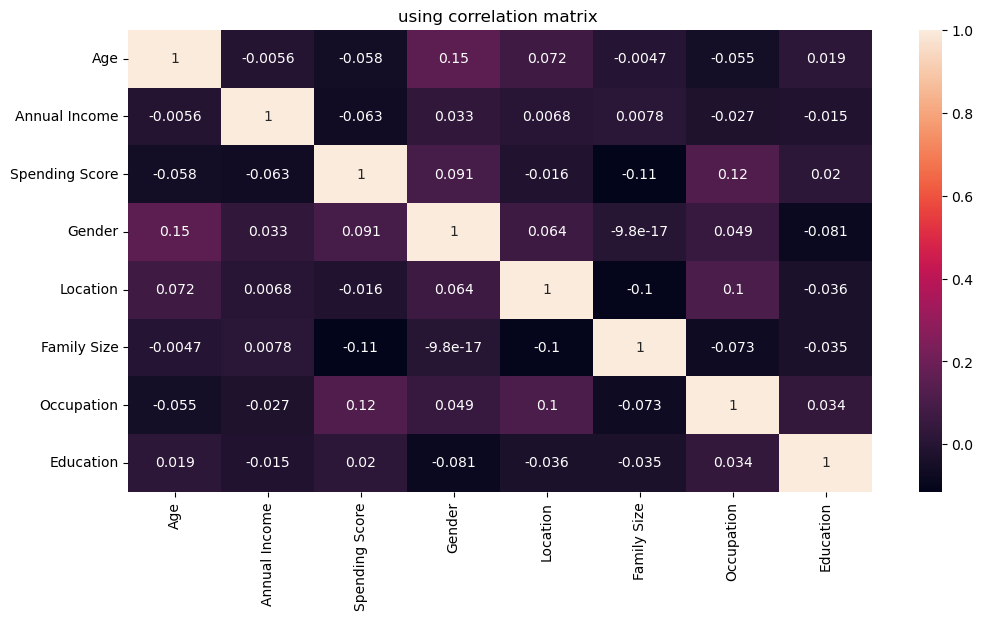

In [75]:
#feature selection
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True)
plt.title("using correlation matrix ")


In [76]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, SpectralClustering

selector = SelectKBest(score_func=f_classif, k=4)
X_selected = selector.fit_transform(features_df, data['Spending Score'])
selected_features_mask = selector.get_support()
selected_feature_names = features_df.columns[selected_features_mask]
print("Most significant features:", selected_feature_names)

Most significant features: Index(['Annual Income', 'Spending Score', 'Location', 'Family Size'], dtype='object')


c:\Users\lsrin\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [77]:
# 2ndPCA
pca = PCA()
X_pca = pca.fit_transform(features_df)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print(len(explained_variance))

8


Text(0.5, 1.0, 'PCA-CumulativeEVR')

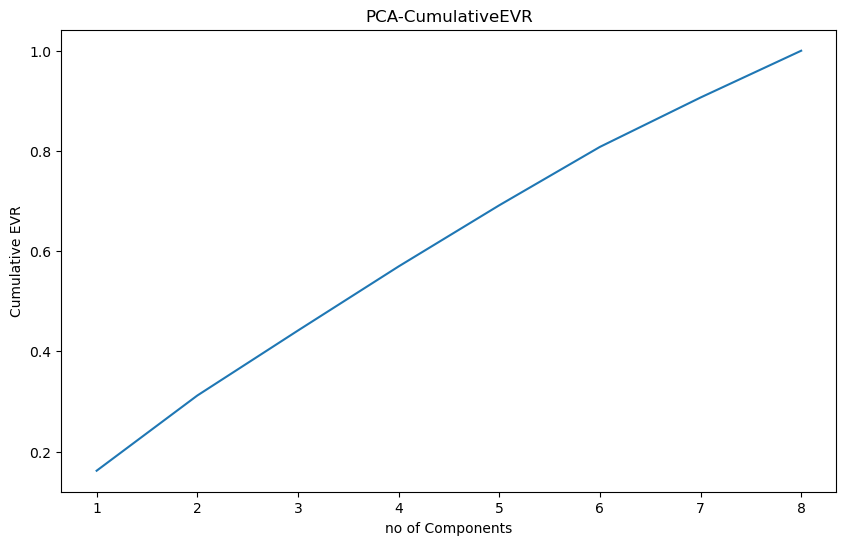

In [78]:

plt.figure(figsize=(10, 6))
r=range(1, len(explained_variance) + 1) #1,9 inclusive,exclusive
plt.plot(r, cumulative_variance)
plt.xlabel('no of Components')
plt.ylabel('Cumulative EVR')
plt.title('PCA-CumulativeEVR')

In [79]:
# no of cluster analysis

from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
K = range(2, 11)
inertias = []
silhouette_scores_kmeans = []
silhouette_scores_hierarchical = []
silhouette_scores_birch = []